In [1]:
# Lab 3
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.array(([[1,2], [2,3], [3,4], [4,5], [5,6]]))
x = data[:,0]
y = data[:,1]

In [6]:
x, y

(array([1, 2, 3, 4, 5]), array([2, 3, 4, 5, 6]))

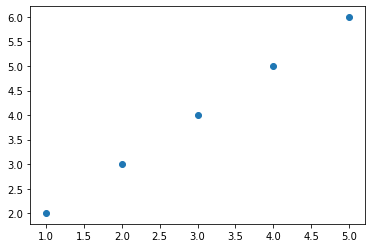

In [7]:
plt.scatter(x, y)

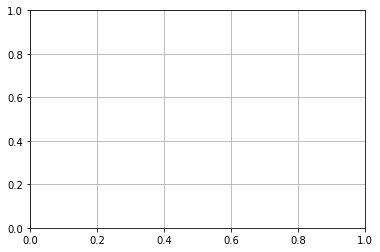

In [12]:
plt.grid(True)
plt.show()


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vec = CountVectorizer(min_df=1)
vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
content = ["How to format my hard disk", "Hard disk format problems"]
X = vec.fit_transform(content)
X

<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [18]:
vec.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [19]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]])

In [21]:
from sklearn.datasets import fetch_20newsgroups as news

In [22]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics',
'sci.med']

In [23]:
twtrains = news(subset='train', categories=categories, shuffle=True, random_state=42)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [25]:
train_counts = vectorizer.fit_transform(twtrains.data)

In [26]:
train_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [31]:
len(vectorizer.get_feature_names())

35788

In [30]:
vectorizer.vocabulary_.get('algorithm')


4690

In [36]:
vecstop = CountVectorizer(stop_words='english')
#vecstopspa = CountVectorizer(stop_words='spanish')

In [ ]:
sorted(vecstop.get_stop_words())[:10]

In [44]:
# sorted(vecstopspa.get_stop_words()) -- jupyter mentiroso

In [48]:
import nltk
s = nltk.stem.SnowballStemmer('english')
s.stem('cats'), s.stem('loving')

('cat', 'love')

In [53]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentence = 'And now for something completely different'
text = word_tokenize(sentence)
text

[nltk_data] Downloading package punkt to /home/crow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['And', 'now', 'for', 'something', 'completely', 'different']

In [54]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/crow/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /home/crow/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [57]:
vec = CountVectorizer(stop_words='english')
analyze = vec.build_analyzer()
analyze('John bought the carrots and potatoes')

['john', 'bought', 'carrots', 'potatoes']

In [58]:
eng_stemmer = nltk.stem.SnowballStemmer('english')
class Stemmed(CountVectorizer):
    def build_analyzer(self):
        analyzer = super().build_analyzer()
        return lambda doc: (eng_stemmer.stem(w) for w in analyzer(doc))
    

In [59]:
mystemmer = Stemmed(min_df=1, stop_words='english')
myanalyzer = mystemmer.build_analyzer()
myanalyzer

<function __main__.Stemmed.build_analyzer.<locals>.<lambda>(doc)>

In [62]:
for token in myanalyzer('John bought carrots and potatoes'):
    print(token)

john
bought
carrot
potato


In [66]:
categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']
twtrains = news(subset='train', categories=categories, shuffle=True, random_state=42)
trcounts = mystemmer.fit_transform(twtrains.data)
len(mystemmer.get_feature_names())

26888

In [68]:
spa_stemmer = nltk.stem.SnowballStemmer('spanish')
class EspStemmed(CountVectorizer):
    def build_analyzer(self):
        analyzer = super().build_analyzer()
        return lambda doc: (spa_stemmer.stem(w) for w in analyzer(doc))
    

In [72]:
myspa_stemmer = EspStemmed(min_df=1, stop_words=['y', ',', '.', 'la', 'de'])
analyze = myspa_stemmer.build_analyzer()
for token in analyze('Esta es la oracion de prueba amando, creando, robando, sufriendo.'):
    print(token)
    
# not so good...
for token in analyze('Amar soñar y sufrir.'):
    print(token)

esta
es
oracion
prueb
amand
cre
rob
sufr
amar
soñ
sufr
